In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
!ls "/content/drive/My Drive/StockPrediction"


In [0]:
# Importing Library
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
# Import data
path="drive/My Drive/StockPrediction/"
stock_data = pd.read_csv(path+'data_stocks.csv')


In [0]:

# Drop date variable
stock_data = stock_data.drop(['DATE'], 1)

# Dimensions of dataset
n = stock_data.shape[0]
p = stock_data.shape[1]
print(n,p)
print(stock_data.head())

In [0]:
# Make data a numpy array
data = stock_data.values
type(data)

numpy.ndarray

Text(0.5, 1.0, 'SP500 stock prices')

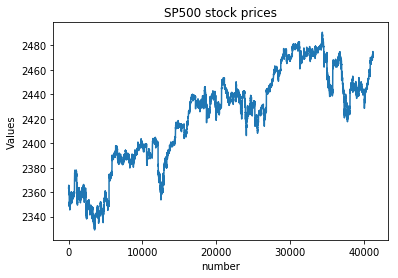

In [0]:
plt.plot(stock_data['SP500'])
plt.xlabel("number")
plt.ylabel("Values")
plt.title("SP500 stock prices")

In [0]:
# Training and test data

train_start = 0
train_end = int(np.floor(0.7*n))

validation_start=train_end;
validation_end=train_end+int(np.floor(0.2*n));

test_start = validation_end
test_end = n

data_train = data[np.arange(train_start, train_end), :]
data_validation=data[np.arange(validation_start,validation_end),:]
data_test = data[np.arange(test_start, test_end), :]

In [0]:
print("Total number of sample in dataset",data.shape[0])
print("No. of samples in training set ",data_train.shape[0])
print("No. of samples in validation set ",data_validation.shape[0])
print("No. of samples in test set ",data_test.shape[0])

Total number of sample in dataset 41266
No. of samples in training set  28886
No. of samples in validation set  8253
No. of samples in test set  4127


In [0]:
# Rescaling the data
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(data_train)
data_train=scaler.transform(data_train)
data_validation=scaler.transform(data_validation)
data_test = scaler.transform(data_test)

In [0]:
# print(data_train)
print(data_train.max(axis=0)) # maximum value in each row
print(data_train.min(axis=0)) # minimum value in each row

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [0]:
# Generating x and y
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_validation=data_validation[:,1:]
y_validation=data_validation[:,0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [0]:
print(y_train);

[-0.50594525 -0.49892217 -0.51927763 ...  0.9991429   0.99742153
  1.        ]


In [0]:
# Initializers for weight and bias
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer() # Initializing bias weight with 0.

In [0]:
# Model architecture parameters

n_stocks = 500
n_neurons_1 = 1024 # Hidden layer 1
n_neurons_2 = 512 # Hidden layer 2
n_neurons_3 = 256 # Hidden layer 3
n_neurons_4 = 128 # Hidden layer 4
n_target = 1

# Initializing weight and bias matrixes

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1,n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))

# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))

# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Layer 1: Variables for hidden weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))


In [0]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [0]:
# // Hidden Layer

hidden_1=tf.nn.relu(tf.add(tf.matmul(X,W_hidden_1),bias_hidden_1))


hidden_2=tf.nn.relu(tf.add(tf.matmul(hidden_1,W_hidden_2),bias_hidden_2))


hidden_3=tf.nn.relu(tf.add(tf.matmul(hidden_2,W_hidden_3),bias_hidden_3))


hidden_4=tf.nn.relu(tf.add(tf.matmul(hidden_3,W_hidden_4),bias_hidden_4))


out=tf.transpose(tf.add(tf.matmul(hidden_4,W_out),bias_out))


In [0]:
# Cost function

cost = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

In [0]:
# Make Session

sess=tf.InteractiveSession()

sess.run(tf.global_variables_initializer())

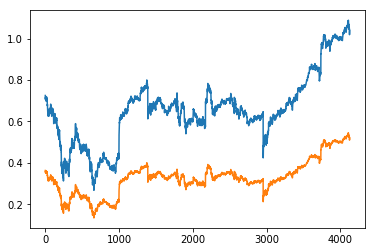

In [0]:
# Setup interactive plot

plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

In [0]:
# Training the data

# Number of epochs and batch size
epochs = 10
batch_size = 256
cost_validation_list=[]
cost_train_list=[]


for e in range(epochs):
    shuffle_indices=np.random.permutation(np.arange(len(y_train)))
    X_train=X_train[shuffle_indices]
    y_train=y_train[shuffle_indices]
    
    
    # Minibatch training
    for i in range(0, len(y_train)):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        # Run optimizer with batch
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})
        
        
        # Show progress
        if np.mod(i, 500) == 0:
            # Prediction
            
            cost_train_list.append(sess.run(cost, feed_dict={X: X_train, Y: y_train}))
            cost_validation_list.append(sess.run(cost, feed_dict={X: X_validation, Y: y_validation}))
            
            print('Epoch ' + str(e) + ', Batch ' + str(i))
            print("Training Cost: ",cost_train_list[-1])
            print("validation Cost: ",cost_validation_list[-1])
            print()
            
            pred = sess.run(out, feed_dict={X: X_validation})
            
#             line2.set_ydata(pred)
#             plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
#             file_name = path+'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
#             plt.savefig(file_name)
#             plt.pause(0.01)
        

Epoch 0, Batch 0
Training Cost:  0.77801126
validation Cost:  1.1887095

Epoch 0, Batch 500
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 1000
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 1500
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 2000
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 2500
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 3000
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 3500
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 4000
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 4500
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 5000
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 5500
Training Cost:  0.116558835
validation Cost:  0.049898926

Epoch 0, Batch 6000
Training Cost:  0.116558835
validation 

In [0]:

# Print final cost function after Training
validation_cost_final = sess.run(cost, feed_dict={X: X_validation, Y: y_validation})
print("Final cost for validation set ", validation_cost_final)

test_cost_final = sess.run(cost, feed_dict={X: X_test, Y: y_test})
print("Final cost for Test set ", test_cost_final)


Final cost for validation set  0.03391946
Final cost for Test set  0.048293248
